In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os.path

%matplotlib inline
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/latex'
plt.rc('text', usetex=True)

In [2]:
def draw_scaling_lines(input_csvname, ax, ylim = []):
    df = pd.read_csv(input_csvname + '.csv', delimiter=',')
    
    from itertools import cycle
    linecycler = cycle(["-","--","-.",":"])
    markercycler = cycle(['o', 'v', 'D', 'd', 'p', 's'])
    
    lines = []
    for column in df.columns:
        if 'thread ID' == column: continue;    
        lines.append(ax.plot(df[column], linestyle = next(linecycler), marker = next(markercycler), \
                             markersize=8, linewidth=3))
    
    
    # associate each tick with thread number
    if [] != ylim:
        ax.set_ylim(ylim)
    #ax.set_xticklabels(df['thread ID'])
    #from matplotlib.ticker import FormatStrFormatter
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
    
    
    return df.columns, lines;

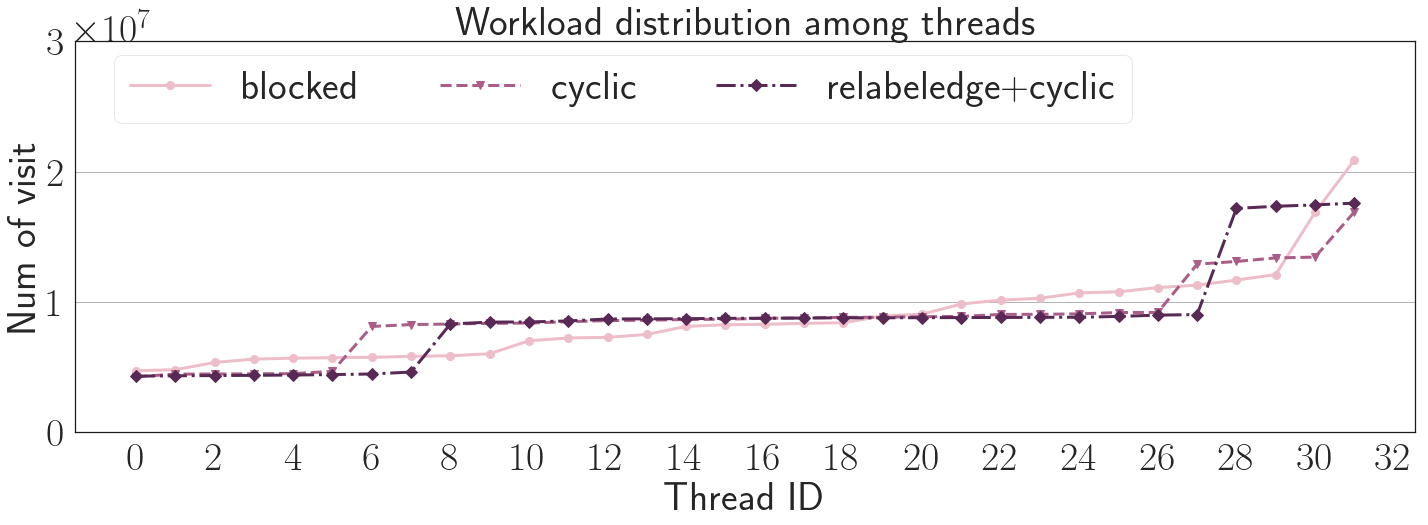

In [13]:
def draw_all_scaling_lines(input, ylim):
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=3, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    
    xaxis_tick = [i for i in range(33) if i % 2 == 0]
    #xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    ax1.xaxis.grid(False)
    
    ax1.set_title('Workload distribution among threads', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Num of visit', fontsize = font_size)
    ax1.set_xlabel('Thread ID', fontsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    plt.ticklabel_format(style='sci', axis='yaxis', scilimits=(0, 0))
    
    # remove every other xlabel
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax1.set_xticklabels(xaxis_range, rotation=0) 
    #ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    columns, lines1 = draw_scaling_lines(input, ax1, ylim)

    
    
    leg = fig.legend(ax1.lines, columns[1:], ncol = 3, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, 
                    bbox_to_anchor = (0.8, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(input + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(input + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

input = 'workload_dist_friendster'
draw_all_scaling_lines(input, ylim=[0, 30000000])


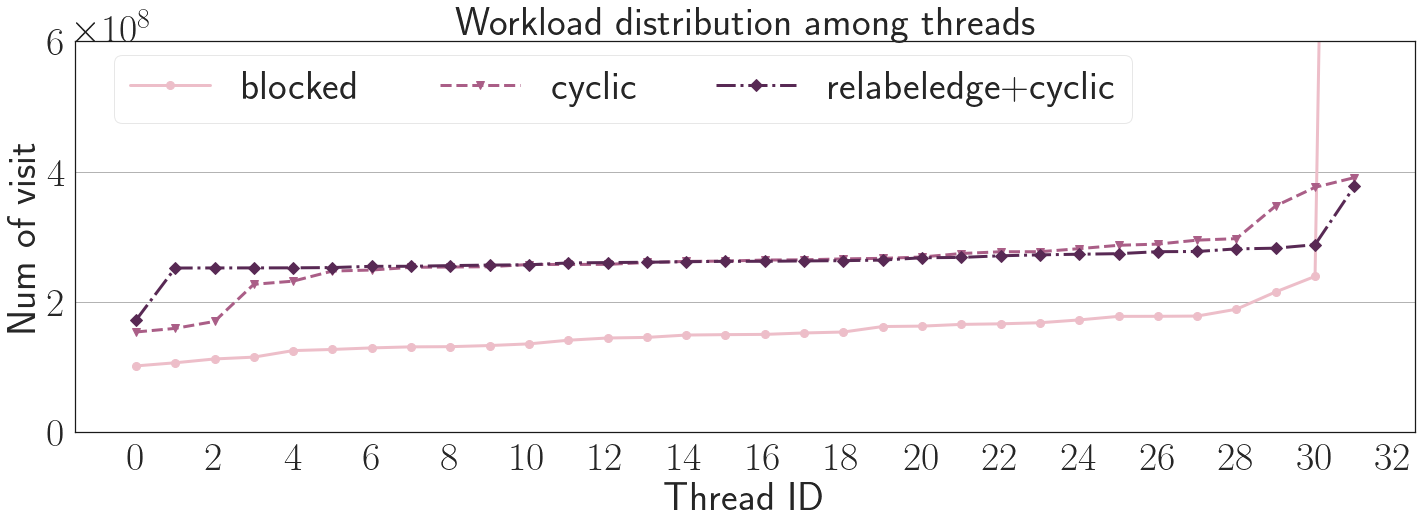

In [14]:

input = 'workload_dist_livejournal'
draw_all_scaling_lines(input, ylim = [0, 600000000])



In [7]:
def draw_all_scaling_lines_v2(input, ylim):
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,9))
    fig.canvas.draw()
    
    
    xaxis_tick = [i for i in range(33) if i % 2 == 0]
    #xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    ax1.xaxis.grid(False)
    
    ax1.set_title('Workload distribution among threads', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Num of visits', fontsize = font_size)
    ax1.set_xlabel('Thread ID', fontsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    plt.ticklabel_format(style='sci', axis='yaxis', scilimits=(0, 0))
    
    # remove every other xlabel
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax1.set_xticklabels(xaxis_range, rotation=0) 
    #ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    columns, lines1 = draw_scaling_lines(input, ax1, ylim)

    
    
    leg = fig.legend(ax1.lines, columns[1:], ncol = 3, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, 
                    bbox_to_anchor = (0.61, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(input + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(input + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

#input = 'workload_dist_friendster-map'
#draw_all_scaling_lines_v2(input, ylim=[0, 30000000])

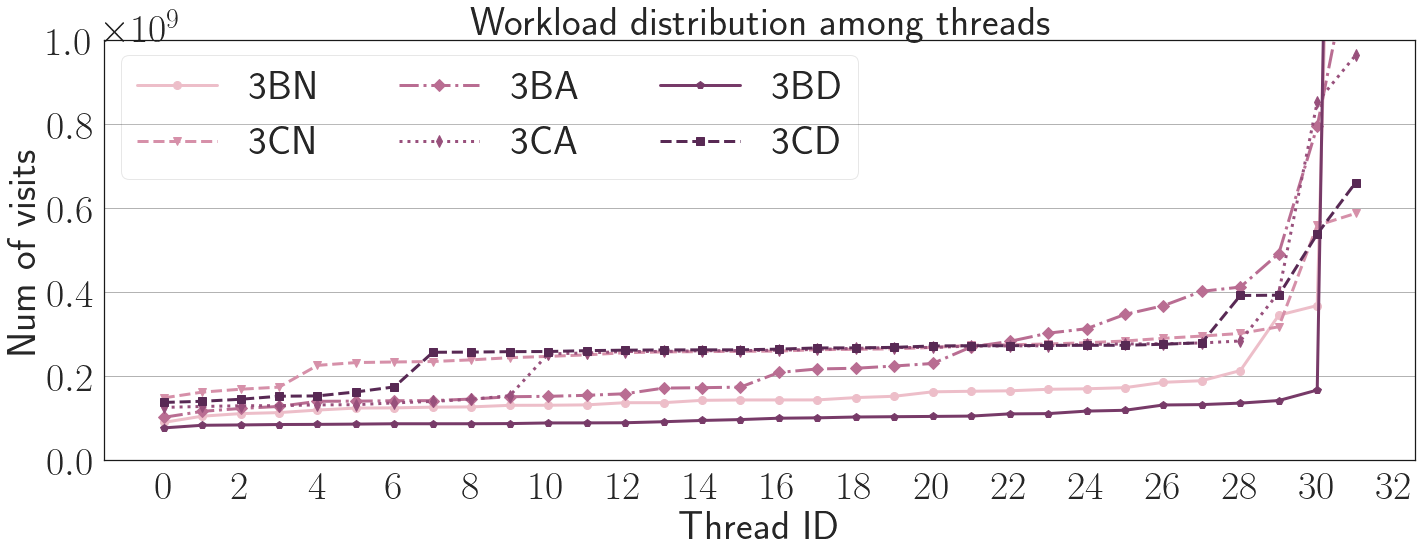

In [8]:
input = 'workload_dist_livejournal-map'
draw_all_scaling_lines_v2(input, ylim = [0, 1000000000])

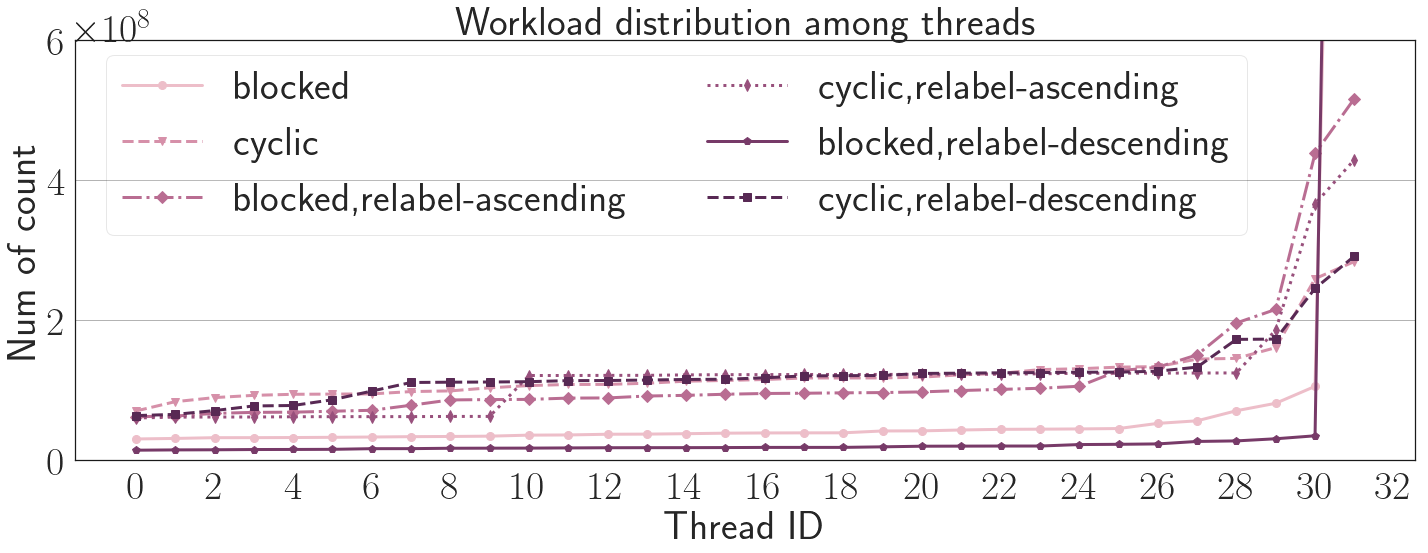

In [10]:
def draw_all_scaling_lines_v3(input, ylim):
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,9))
    fig.canvas.draw()
    
    
    xaxis_tick = [i for i in range(33) if i % 2 == 0]
    #xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    ax1.xaxis.grid(False)
    
    ax1.set_title('Workload distribution among threads', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Num of count', fontsize = font_size)
    ax1.set_xlabel('Thread ID', fontsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    plt.ticklabel_format(style='sci', axis='yaxis', scilimits=(0, 0))
    
    # remove every other xlabel
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax1.set_xticklabels(xaxis_range, rotation=0) 
    #ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    columns, lines1 = draw_scaling_lines(input, ax1, ylim)

    
    
    leg = fig.legend(ax1.lines, columns[1:], ncol = 2, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, 
                    bbox_to_anchor = (0.88, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(input + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(input + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

input = 'workload-dist_livejournal-map-count'
draw_all_scaling_lines_v3(input, ylim = [0, 600000000])

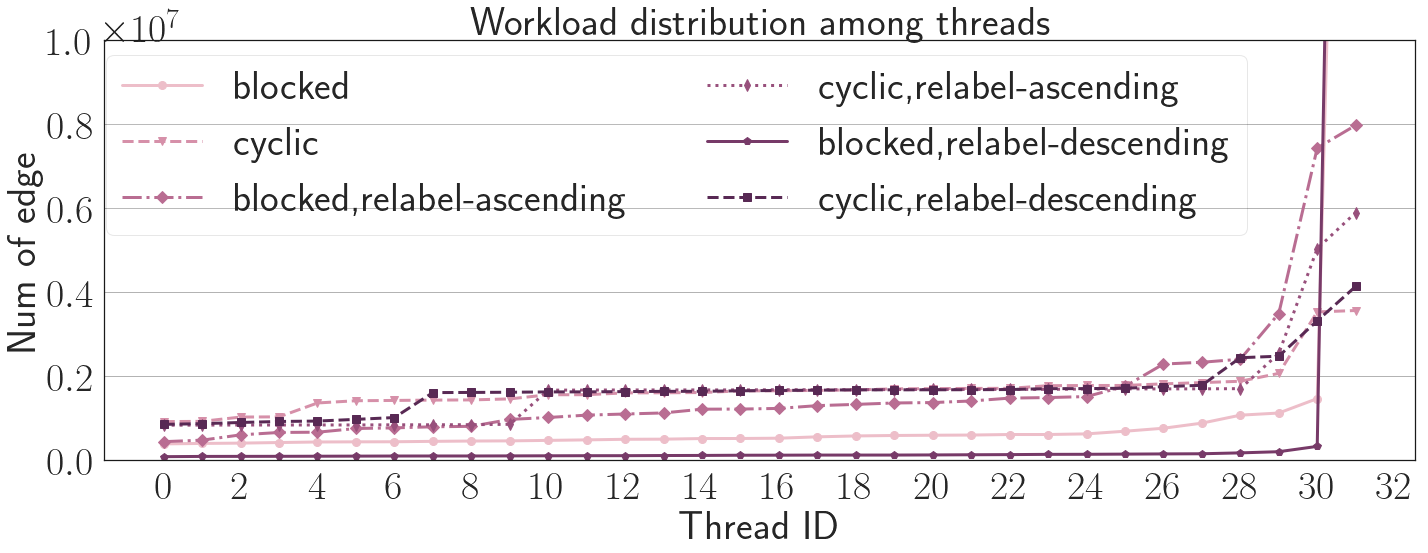

In [16]:
def draw_all_scaling_lines_v4(input, ylim):
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=6, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    font_size = 40
    fig = plt.figure(figsize = (20,9))
    fig.canvas.draw()
    
    
    xaxis_tick = [i for i in range(33) if i % 2 == 0]
    #xaxis_range = ['1', '2', '4', '8', '16', '32']
    
    
    from matplotlib import ticker 
    ax1 = plt.subplot(111)
    ax1.xaxis.grid(False)
    
    ax1.set_title('Workload distribution among threads', fontsize = font_size)
    ax1.tick_params(labelsize = font_size)
    ax1.set_xticks(xaxis_tick)
    ax1.set_ylabel('Num of edge', fontsize = font_size)
    ax1.set_xlabel('Thread ID', fontsize = font_size)
    ax1.yaxis.get_offset_text().set_size(font_size)
    plt.ticklabel_format(style='sci', axis='yaxis', scilimits=(0, 0))
    
    # remove every other xlabel
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax1.set_xticklabels(xaxis_range, rotation=0) 
    #ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    columns, lines1 = draw_scaling_lines(input, ax1, ylim)

    
    
    leg = fig.legend(ax1.lines, columns[1:], ncol = 2, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, 
                    bbox_to_anchor = (0.88, 0.8))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(input + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(input + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

input = 'workload_dist_livejournal-map-edges'
draw_all_scaling_lines_v4(input, ylim = [0, 10000000])

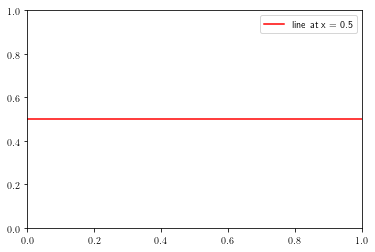

In [10]:


import matplotlib.pyplot as plt



plt.axhline(y=[.5], label='line at x = {}'.format(xc), c='red')

plt.legend()
plt.show()